Importing modules

In [1]:
import pandas as pd
import numpy as np
import random
import copy
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
from sklearn.preprocessing import OneHotEncoder

---

Getting data from csv file

In [2]:
filename = 'C:\\Users\\serma\\Desktop\\Універ\\2 курс\\2 семестр\\АД\\Lab3\\abalone.csv'

headers = ['sex', 'length', 'diameter', 'height', 'whole_weight', 'shuked_weight', 'viscera_weight', 'shell_weight', 'rings']

df = pd.read_csv(filename, header=1, names=headers)
df.head()

,sex,length,diameter,height,whole_weight,shuked_weight,viscera_weight,shell_weight,rings
0,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
1,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
2,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
3,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
4,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20


In [3]:
df.head()

,sex,length,diameter,height,whole_weight,shuked_weight,viscera_weight,shell_weight,rings
0,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
1,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
2,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
3,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
4,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20


---

Creating missing values

In [4]:
def making_missing_values(dataset):
    for _ in range(500):
        dataset.at[random.randint(0, 4174), headers[random.randint(0, 8)]] = None
    return dataset

In [5]:
miss_df = making_missing_values(df)

In [6]:
miss_df

,sex,length,diameter,height,whole_weight,shuked_weight,viscera_weight,shell_weight,rings
0,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9.0
1,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10.0
2,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7.0
3,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8.0
4,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300,20.0
...,...,...,...,...,...,...,...,...,...
4170,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11.0
4171,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10.0
4172,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9.0
4173,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10.0


---

Fixing missing values

---

General deleting NaN values method

In [7]:
good_df = miss_df.dropna()
good_df

,sex,length,diameter,height,whole_weight,shuked_weight,viscera_weight,shell_weight,rings
0,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9.0
1,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10.0
2,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7.0
3,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8.0
4,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300,20.0
...,...,...,...,...,...,...,...,...,...
4169,M,0.560,0.430,0.155,0.8675,0.4000,0.1720,0.2290,8.0
4170,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11.0
4171,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10.0
4172,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9.0


Function for deleting non NaN values

In [8]:
# def deleting_missing_values(dataset):
#     rows_to_drop = []
    
#     for row in range(dataset.shape[0]):
#         for col in dataset.columns:
#             if dataset.at[row, col] == '?':
#                 rows_to_drop.append(row)
#                 break
                
#     dataset = dataset.drop(dataset.index[rows_to_drop])
    
#     return dataset

In [9]:
# good_df = deleting_missing_values(miss_df)
# good_df

Last Obs. Carried Forward

In [10]:
def locf(dataset):
    dataset = copy.deepcopy(dataset)
    for row in range(dataset.shape[0]):
        for col in dataset.columns:
            if pd.isna(dataset.at[row, col]) and row != 0:  # При умові що перший рядок буде мати всі значення
                dataset.at[row, col] = dataset.at[row-1, col]
    return dataset

In [11]:
good_df = locf(miss_df)
good_df

,sex,length,diameter,height,whole_weight,shuked_weight,viscera_weight,shell_weight,rings
0,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9.0
1,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10.0
2,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7.0
3,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8.0
4,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300,20.0
...,...,...,...,...,...,...,...,...,...
4170,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11.0
4171,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10.0
4172,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9.0
4173,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10.0


---

 Functions from sklearn module

In [12]:
from sklearn.impute import SimpleImputer

Mean

In [13]:
def mean_fix(dataset):
    dataset = copy.deepcopy(dataset)
    imputer = SimpleImputer(missing_values=pd.NA, strategy='mean')
    good_df = imputer.fit_transform(dataset[['length', 'diameter', 'height', 'whole_weight', 'shuked_weight', 'viscera_weight', 'shell_weight', 'rings']])
    good_df = pd.DataFrame(good_df, columns=headers[1:])
    good_df.insert(0, 'sex', dataset[['sex']], True)
    return good_df

In [14]:
good_df = mean_fix(miss_df)
good_df

,sex,length,diameter,height,whole_weight,shuked_weight,viscera_weight,shell_weight,rings
0,F,0.530,0.420,0.135000,0.6770,0.2565,0.1415,0.2100,9.0
1,M,0.440,0.365,0.125000,0.5160,0.2155,0.1140,0.1550,10.0
2,I,0.330,0.255,0.080000,0.2050,0.0895,0.0395,0.0550,7.0
3,I,0.425,0.300,0.095000,0.3515,0.1410,0.0775,0.1200,8.0
4,F,0.530,0.415,0.150000,0.7775,0.2370,0.1415,0.3300,20.0
...,...,...,...,...,...,...,...,...,...
4170,F,0.565,0.450,0.165000,0.8870,0.3700,0.2390,0.2490,11.0
4171,M,0.590,0.440,0.135000,0.9660,0.4390,0.2145,0.2605,10.0
4172,M,0.600,0.475,0.205000,1.1760,0.5255,0.2875,0.3080,9.0
4173,F,0.625,0.485,0.150000,1.0945,0.5310,0.2610,0.2960,10.0


Median

In [15]:
def median_fix(dataset):
    dataset = copy.deepcopy(dataset)
    imputer = SimpleImputer(missing_values=pd.NA, strategy='median')
    good_df = imputer.fit_transform(dataset[['length', 'diameter', 'height', 'whole_weight', 'shuked_weight', 'viscera_weight', 'shell_weight', 'rings']])
    good_df = pd.DataFrame(good_df, columns=headers[1:])
    good_df.insert(0, 'sex', dataset[['sex']], True)
    return good_df

In [16]:
good_df = median_fix(miss_df)
good_df

,sex,length,diameter,height,whole_weight,shuked_weight,viscera_weight,shell_weight,rings
0,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9.0
1,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10.0
2,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7.0
3,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8.0
4,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300,20.0
...,...,...,...,...,...,...,...,...,...
4170,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11.0
4171,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10.0
4172,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9.0
4173,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10.0


Moda

In [17]:
def moda_fix(dataset):
    dataset = copy.deepcopy(dataset)
    imputer = SimpleImputer(missing_values=pd.NA, strategy='most_frequent')
    good_df = imputer.fit_transform(dataset[['length', 'diameter', 'height', 'whole_weight', 'shuked_weight', 'viscera_weight', 'shell_weight', 'rings']])
    good_df = pd.DataFrame(good_df, columns=headers[1:])
    good_df.insert(0, 'sex', dataset[['sex']], True)
    return good_df

In [18]:
good_df = moda_fix(miss_df)
good_df

,sex,length,diameter,height,whole_weight,shuked_weight,viscera_weight,shell_weight,rings
0,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9.0
1,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10.0
2,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7.0
3,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8.0
4,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300,20.0
...,...,...,...,...,...,...,...,...,...
4170,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11.0
4171,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10.0
4172,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9.0
4173,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10.0


- - -

Normalization

In [19]:
def normalize_dataset(dataset):
    norm_dataset = copy.deepcopy(dataset)
    
    for col in norm_dataset.columns:
        if norm_dataset[f'{col}'].dtype == 'float64':
            min_val = min(norm_dataset[f'{col}'])
            max_val = max(norm_dataset[f'{col}'])
            
            norm_dataset[f'{col}'] = norm_dataset[f'{col}'].apply(lambda x: ((x-min_val)/(max_val-min_val)))
            
    return norm_dataset

In [20]:
norm_df = normalize_dataset(good_df)
norm_df

,sex,length,diameter,height,whole_weight,shuked_weight,viscera_weight,shell_weight,rings
0,F,0.614865,0.613445,0.119469,0.239065,0.171822,0.185648,0.207773,0.285714
1,M,0.493243,0.521008,0.110619,0.182044,0.144250,0.149440,0.152965,0.321429
2,I,0.344595,0.336134,0.070796,0.071897,0.059516,0.051350,0.053313,0.214286
3,I,0.472973,0.411765,0.084071,0.123783,0.094149,0.101382,0.118087,0.250000
4,F,0.614865,0.605042,0.132743,0.274659,0.158709,0.185648,0.327354,0.678571
...,...,...,...,...,...,...,...,...,...
4170,F,0.662162,0.663866,0.146018,0.313441,0.248151,0.314022,0.246637,0.357143
4171,M,0.695946,0.647059,0.119469,0.341420,0.294553,0.281764,0.258097,0.321429
4172,M,0.709459,0.705882,0.181416,0.415796,0.352724,0.377880,0.305431,0.285714
4173,F,0.743243,0.722689,0.132743,0.386931,0.356422,0.342989,0.293473,0.321429


In [40]:
min(norm_df['length'])

0.0

Standartization

In [22]:
def standartize_dataset(dataset):
    st_dataset = copy.deepcopy(dataset)
    
    for col in st_dataset.columns:
        if st_dataset[f'{col}'].dtype == 'float64':
            mean_val = st_dataset[f'{col}'].mean()
            std_val = st_dataset[f'{col}'].std()
            
            st_dataset[f'{col}'] = st_dataset[f'{col}'].apply(lambda x: ((x-mean_val)/std_val))
            
    return st_dataset

In [23]:
standart_df = standartize_dataset(good_df)
standart_df

,sex,length,diameter,height,whole_weight,shuked_weight,viscera_weight,shell_weight,rings
0,F,0.047915,0.116839,-0.111397,-0.288767,-0.454834,-0.359847,-0.214398,-0.287155
1,M,-0.706017,-0.439146,-0.351439,-0.615427,-0.639693,-0.612728,-0.612883,0.025948
2,I,-1.627490,-1.551117,-1.431631,-1.246429,-1.207798,-1.297807,-1.337402,-0.913360
3,I,-0.831673,-1.096220,-1.071567,-0.949189,-0.975596,-0.948371,-0.866465,-0.600258
4,F,0.047915,0.066294,0.248667,-0.084858,-0.542755,-0.359847,0.655025,3.156977
...,...,...,...,...,...,...,...,...,...
4170,F,0.341110,0.420103,0.608731,0.137311,0.056911,0.536733,0.068165,0.339051
4171,M,0.550536,0.319015,-0.111397,0.297598,0.368016,0.311439,0.151484,0.025948
4172,M,0.634306,0.672824,1.568901,0.723677,0.758024,0.982724,0.495631,-0.287155
4173,F,0.843732,0.773912,0.248667,0.558318,0.782822,0.739038,0.408689,0.025948


In [25]:
good_df.head()

,sex,length,diameter,height,whole_weight,shuked_weight,viscera_weight,shell_weight,rings
0,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9.0
1,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10.0
2,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7.0
3,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8.0
4,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20.0


---

Histograms

In [26]:
def histogram():
    ranges = [(0, 0.1), (0.1, 0.2), (0.2, 0.3), (0.3, 0.4), (0.4, 0.5),
              (0.5, 0.6), (0.6, 0.7), (0.7, 0.8), (0.8, 0.9), (0.9, 1.0)]
    
    hist_data = [[] for _ in range(len(ranges))]
    
    for value in good_df['length']:
        for i, (start, end) in enumerate(ranges):
            if start <= value < end:
                hist_data[i].append(value)
                break
    
    plt.figure(figsize=(10, 6))
    for i, data in enumerate(hist_data):
        sns.histplot(data, bins=10, kde=True, label=f'Range {ranges[i]}')
    plt.legend()
    plt.xticks([x/10 for x in range(11)])
    plt.xlim(0, 1)
    plt.xlabel('Length')
    plt.ylabel('Frequency')
    plt.title('Histogram')  
    plt.show()

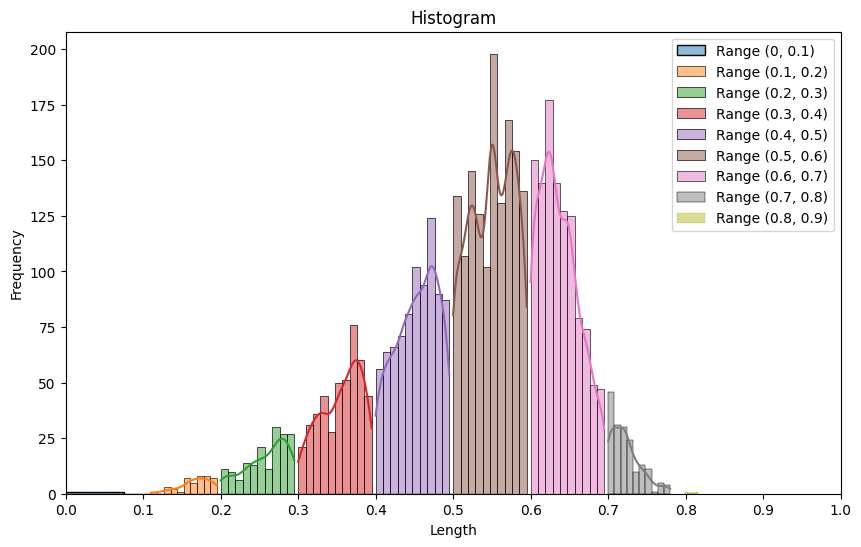

In [27]:
histogram()

Plot of dependence

In [28]:
def dependence():
    sns.scatterplot(data=good_df, x='diameter', y='rings')

    plt.xlabel('diameter')
    plt.ylabel('rings')
    
    plt.show()

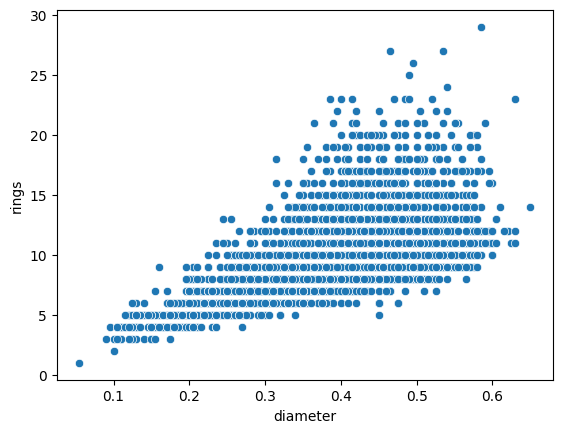

In [29]:
dependence()

---

Pearson and Spearman correlations

Pearson correlation

In [30]:
# Коефіцієнт Пірсона для залежності між повною вагою молюска та вагою його панциря
correlation_pearson1 = scipy.stats.pearsonr(good_df['whole_weight'], good_df['shell_weight'])[0]
correlation_pearson1
# Як бачимо, повна вага молюска майже напряму корелює з вагою його панциря

0.9284851796461278

In [31]:
# Коефіцієнт Пірсона для залежності між діаметром молюска та кількістю кілець на його тілі
correlation_pearson2 = scipy.stats.pearsonr(good_df['diameter'], good_df['rings'])[0]
correlation_pearson2
# Певна кореляція прослідковується, проте вона не настільки явна, як в попередньому прикладі

0.5696239577177203

Spearman correlation

In [32]:
# Коефіцієнт Спірмана для залежності між повною вагою молюска та вагою його панциря
correlation_spearman1 = scipy.stats.spearmanr(good_df['whole_weight'], good_df['shell_weight'])[0]
correlation_spearman1
# Знову ж таки бачимо, що ці два показники майже на пряму корелюють між собою

0.9390298039388958

In [33]:
good_df = locf(miss_df)  # Нам потрібно, щоб датафрейм не містив пустих значень, тому використаємо цей метод прибирання, бо всі інші чистять тільки числові значення

In [34]:
# Коефіцієнт Спірмана для залежності між статтю молюска та його довжиною
correlation_spearman2 = scipy.stats.spearmanr(good_df['sex'], good_df['whole_weight'])[0]
correlation_spearman2
# Як бачимо, в данному випадку зовсім не прослідковується кореляція між цими показниками

-0.013695453088333582

---

One Hot Encoding

In [35]:
def ohe(dataset):
    good_df = copy.deepcopy(dataset)
    sex_data = good_df['sex'].values.reshape(-1, 1)

    enc = OneHotEncoder()
    enc_data = enc.fit_transform(sex_data)
    enc_df = pd.DataFrame(enc_data.toarray())
    enc_df.columns = ['Female', 'Infant', 'Male']
    
    good_df.drop('sex', inplace=True, axis=1)
    
    for i, col in enumerate(enc_df):
        good_df.insert(i, col, enc_df[col], True)
        
    return good_df

In [36]:
ohe_df = ohe(good_df)
ohe_df

,Female,Infant,Male,length,diameter,height,whole_weight,shuked_weight,viscera_weight,shell_weight,rings
0,1.0,0.0,0.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9.0
1,0.0,0.0,1.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10.0
2,0.0,1.0,0.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7.0
3,0.0,1.0,0.0,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8.0
4,1.0,0.0,0.0,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300,20.0
...,...,...,...,...,...,...,...,...,...,...,...
4170,1.0,0.0,0.0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11.0
4171,0.0,0.0,1.0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10.0
4172,0.0,0.0,1.0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9.0
4173,1.0,0.0,0.0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10.0


In [37]:
good_df.head()

,sex,length,diameter,height,whole_weight,shuked_weight,viscera_weight,shell_weight,rings
0,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9.0
1,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10.0
2,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7.0
3,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8.0
4,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20.0


---

Pairplot

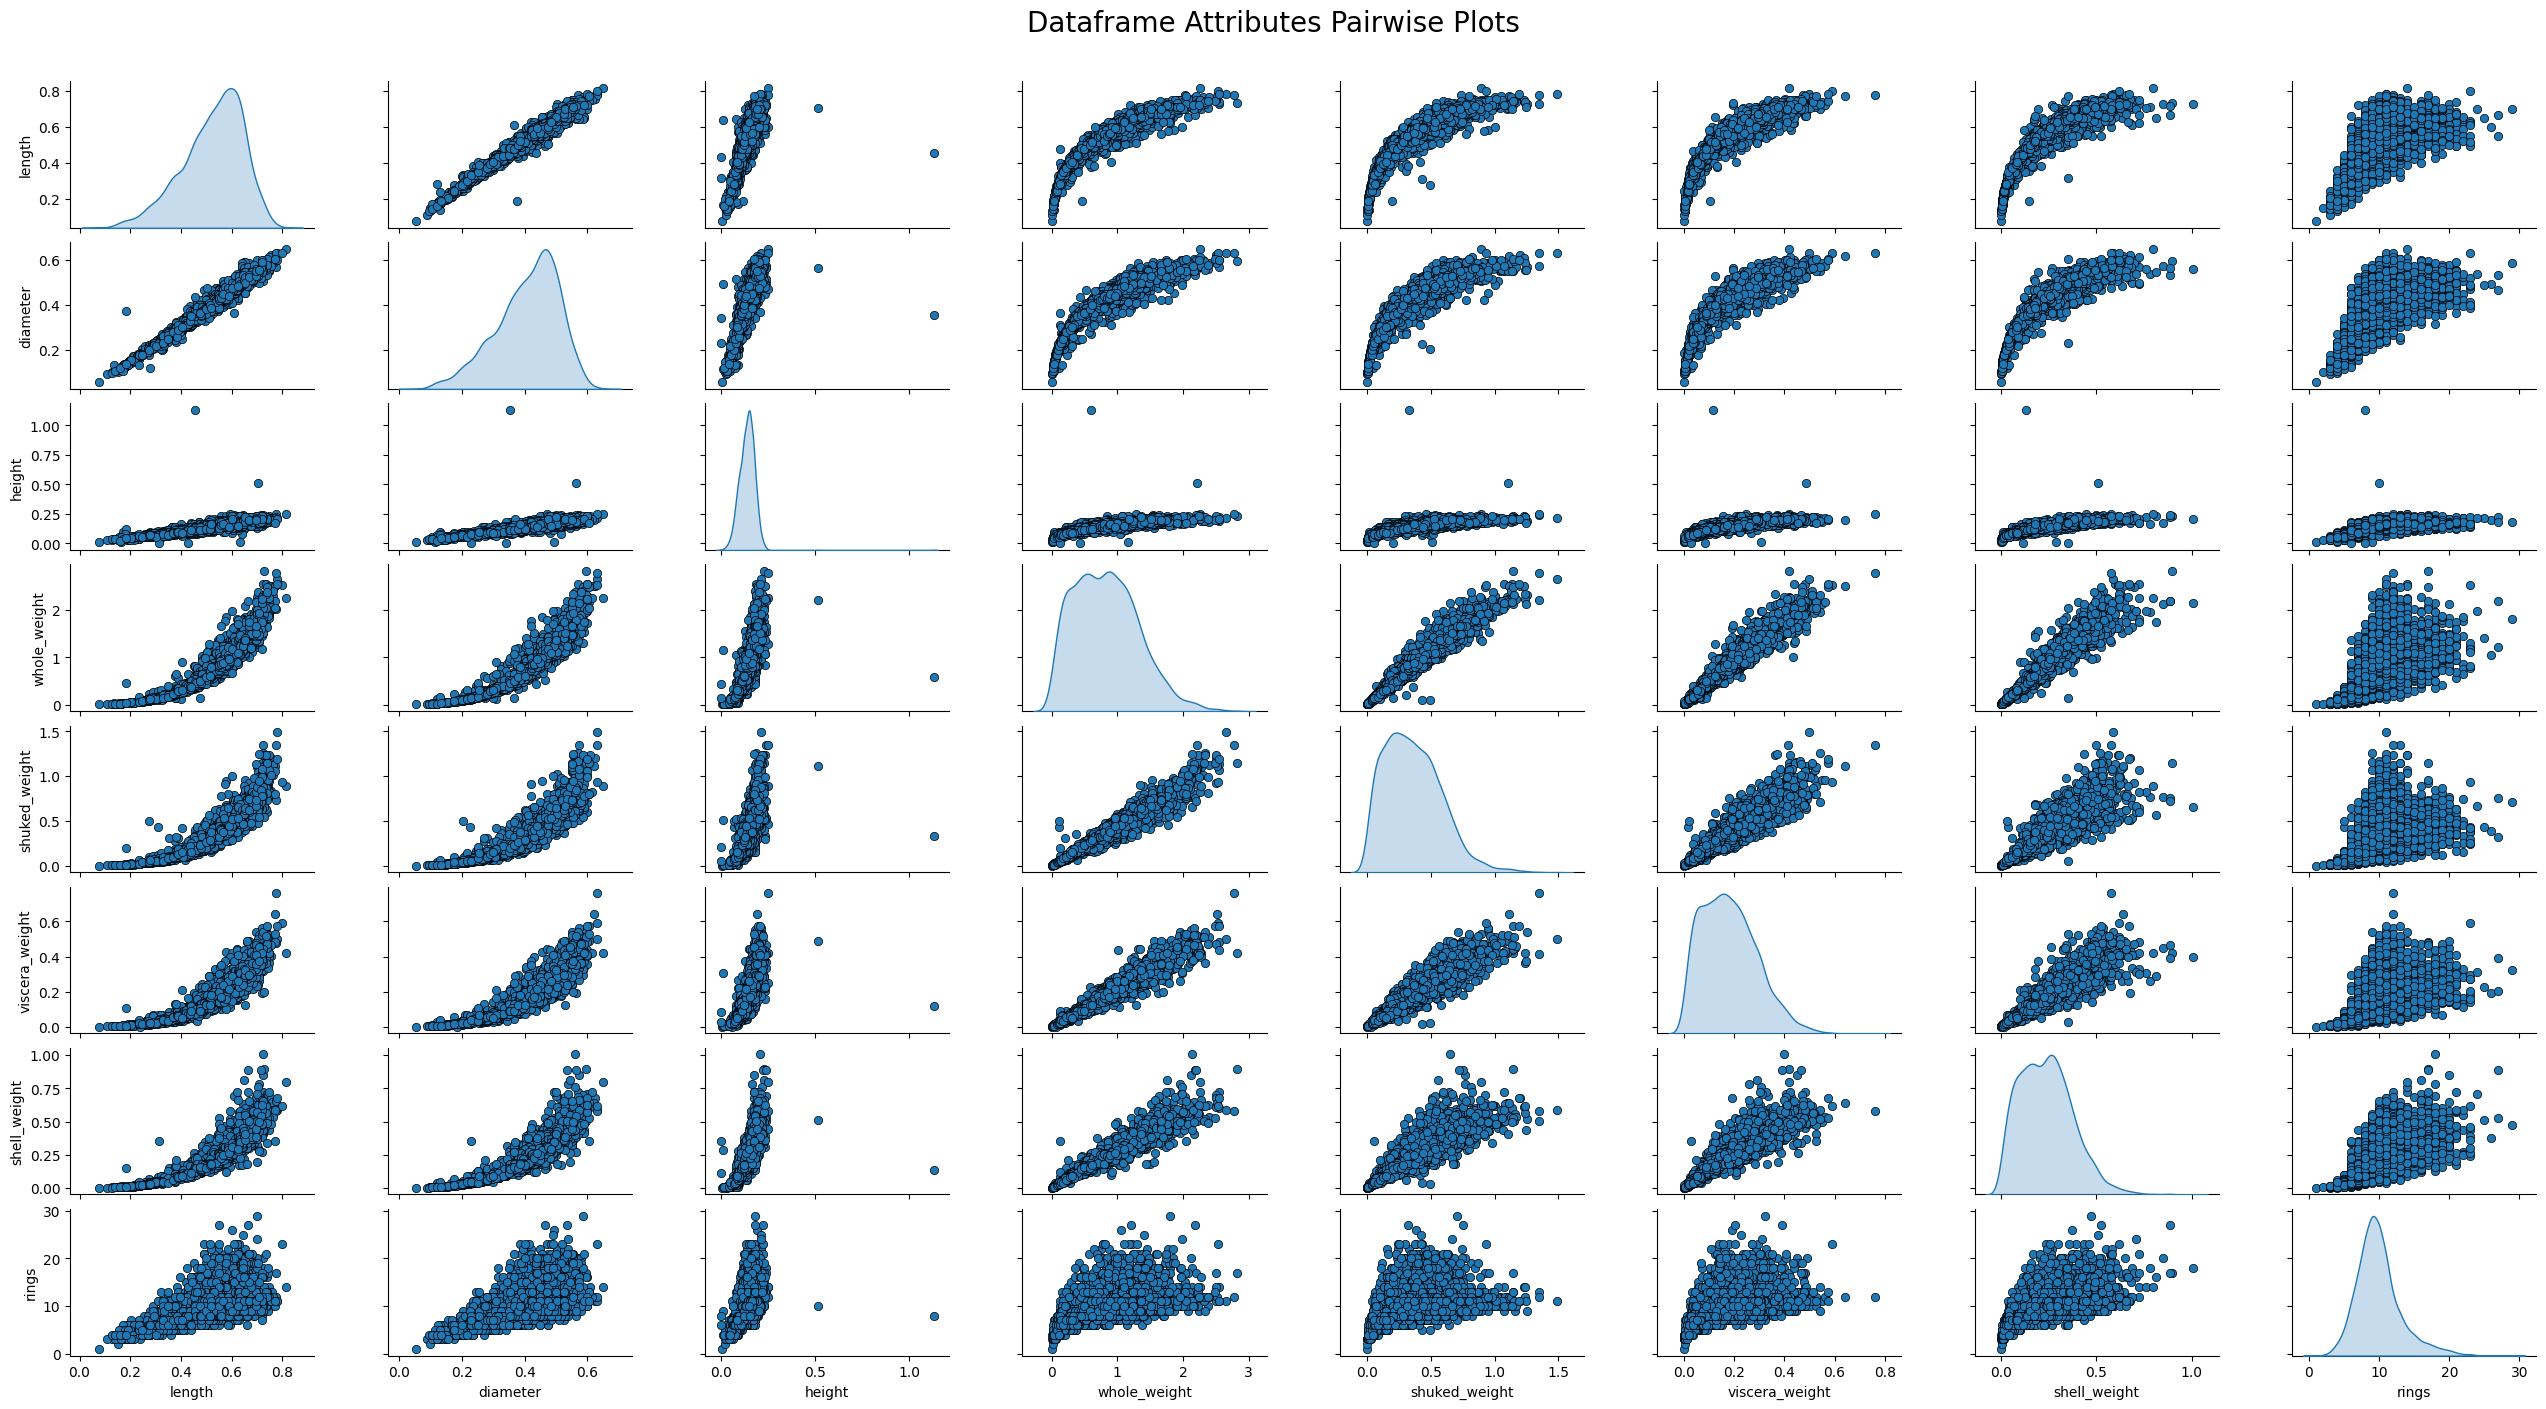

In [38]:
cols = ['length', 'diameter', 'height', 'whole_weight', 'shuked_weight', 'viscera_weight', 'shell_weight', 'rings']
pp = sns.pairplot(df[cols], height=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(fill=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Dataframe Attributes Pairwise Plots', fontsize=20)